# What to expect

In notebook 2B we looked at the output of STAR, and combined the results for each sample in the <i>Schistosoma mansoni</i> example dataset into a single dataframe. We considered ways to normalize the gene count data and viewed the results using  Principle Components Analysis. In this second part of this session, you will repeat most of this process for your choice of dataset.

### The datasets
The following two datasets are available. Click on the links to find out more about each one:
1. *Plasmodium*
2. *Trypanosoma*

In [1]:
# Which dataset are you considering?
dataset = "Trypanosoma"

# Inspect STAR results
As before, take a look at the `analysis/<dataset>/multiqc/multiqc_report.html` by double-clicking:

<div class="alert alert-block alert-warning">
Questions:
    
1. What percentage of reads aligned to the reference (provide a range)? How does this compare to the example?
2. What percentage of reads mapped exactly once in each sample? Does this look reasonable?
3. Are there any samples which look less good? In what way?

<div class="alert alert-block alert-success">
Answers:
    
1. 61.1-70.8% This covers a smaller range than the example, and most of the percentages are smaller
2. Same percentages as for (1)
3. Samples are quite uniform in terms of percentage of aligned reads and numbers of reads - none are much worse

# Strandedness
Choose an accession and take a look at `analysis/<dataset>/star/<accession>/<accession>ReadsPerGene.out.tab`. 

<div class="alert alert-block alert-warning">
Question:
    
4. Do you think this library was stranded, reverse stranded or unstranded?


<details>
<summary><i>Hint</i></summary>

Use `head` on the command line to view the first few lines of a file. You can set the number of lines with `-n`
</details>

In [2]:
! head -n 30 analysis/Trypanosoma/star/SRR7207625/SRR7207625ReadsPerGene.out.tab

N_unmapped	2945577	2945577	2945577
N_multimapping	6040167	6040167	6040167
N_noFeature	1259531	7808850	7811686
N_ambiguous	152510	71040	60465
Tb04.24M18.150	137	67	70
Tb04.3I12.100	221	135	86
Tb05.30F7.410	118	81	67
Tb05.5K5.10	0	0	0
Tb05.5K5.100	16	8	8
Tb05.5K5.110	284	146	138
Tb05.5K5.120	132	64	69
Tb05.5K5.130	920	469	452
Tb05.5K5.140	31	22	9
Tb05.5K5.150	348	147	201
Tb05.5K5.160	86	30	58
Tb05.5K5.170	9	6	3
Tb05.5K5.180	51	30	21
Tb05.5K5.190	452	217	235
Tb05.5K5.20	384	201	183
Tb05.5K5.200	109	57	52
Tb05.5K5.210	647	290	359
Tb05.5K5.220	502	249	253
Tb05.5K5.230	103	67	36
Tb05.5K5.240	272	134	138
Tb05.5K5.250	73	35	38
Tb05.5K5.260	1200	563	638
Tb05.5K5.270	186	106	82
Tb05.5K5.280	727	406	321
Tb05.5K5.290	68	42	26
Tb05.5K5.30	410	222	188


<div class="alert alert-block alert-success">
Answer:
    
4. Unstranded

# Combining data accross samples
To ensure you have the correct results going forwards we have already combined the outputs for this dataset into `analysis/<dataset>/star/ReadsPerGene.csv`. Use pandas to load the dataframe and take a look at it.

In [3]:
import pandas as pd

df = pd.read_csv(f"analysis/{dataset}/star/ReadsPerGene.csv", index_col=0)

In [4]:
df

,SRR7207625,SRR7207626,SRR7207627,SRR7207628,SRR7207629,SRR7207630,SRR7207631,SRR7207632,SRR7207633,SRR7207634,SRR7207635,SRR7207636,SRR7207637,SRR7207638,SRR7207639,SRR7207640,SRR7207641,SRR7207642
gene,,,,,,,,,,,,,,,,,,
Tb04.24M18.150,137.0,171.0,195.0,254.0,250.0,191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tb04.3I12.100,221.0,194.0,160.0,244.0,256.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tb05.30F7.410,118.0,228.0,80.0,80.0,39.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tb05.5K5.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tb05.5K5.100,16.0,8.0,12.0,35.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tmp.1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tmp.1.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tmp.1.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Normalization with DESeq2

As with the example dataset, we will load this dataset into a DeseqDataSet and use DESeq2 to normalize the counts. For each dataset we have provided metadata in `data/<dataset>/metadata.csv`. First use pandas to load the metadata and have a look. 

In [5]:
metadata = pd.read_csv(f"data/{dataset}/metadata.csv", index_col=0)
counts = df.T

In [6]:
metadata

,biosample,condition,organism,morphology
accession,,,,
SRR7207625,SAMN09241945,ascending,Trypanosoma brucei brucei,slender
SRR7207626,SAMN09241944,ascending,Trypanosoma brucei brucei,slender
SRR7207627,SAMN09241943,ascending,Trypanosoma brucei brucei,slender
SRR7207628,SAMN09241942,peak,Trypanosoma brucei brucei,stumpy
SRR7207629,SAMN09241941,peak,Trypanosoma brucei brucei,stumpy
SRR7207630,SAMN09241940,peak,Trypanosoma brucei brucei,stumpy
SRR7207631,SAMN09241939,ascending,Trypanosoma congolense,mono
SRR7207632,SAMN09241939,ascending,Trypanosoma congolense,mono
SRR7207633,SAMN09241938,ascending,Trypanosoma congolense,mono


For *Plasmodium*, we want to compare the wildtype at the different timepoints. For *Trypanosoma*, we want to compare *Trypanosoma brucei brucei* stages with different morphologies. Filter the datasets to contain just these samples. 

In [7]:
counts_s = counts[metadata["organism"].isin(["Trypanosoma brucei brucei"])]
metadata_s = metadata[metadata["organism"].isin(["Trypanosoma brucei brucei"])]

Generate a DeseqDataSet object for your analysis thinking about what to pass in to the `design factors` parameter.

In [8]:
from pydeseq2.dds import DeseqDataSet

dds = DeseqDataSet(
    counts=counts_s,
    metadata=metadata_s,
    refit_cooks=True,
    design_factors="morphology"
)

dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.08 seconds.

Fitting dispersion trend curve...
... done in 0.27 seconds.

Fitting MAP dispersions...
... done in 1.22 seconds.

Fitting LFCs...
... done in 0.75 seconds.

Replacing 0 outlier genes.



In [9]:
# View the normed counts using the following
dds.layers['normed_counts']

array([[150.77367546, 243.21884873, 129.86345769, ...,   0.        ,
          0.        ,   0.        ],
       [186.30448689, 211.36298512, 248.40598251, ...,   0.        ,
          0.        ,   0.        ],
       [210.22218884, 172.4900011 ,  86.24500055, ...,   0.        ,
          0.        ,   0.        ],
       [233.40274118, 224.21365688,  73.51267439, ...,   0.        ,
          0.        ,   0.        ],
       [230.53541076, 236.06826062,  35.96352408, ...,   0.        ,
          0.        ,   0.        ],
       [172.51599572, 223.09660179,  21.6774026 , ...,   0.        ,
          0.        ,   0.        ]])

# PCA Plot

Now take a look at how the overall data looks on a Principle Components Analysis plot of PC1 and PC2. Plot the loadings associated these components.

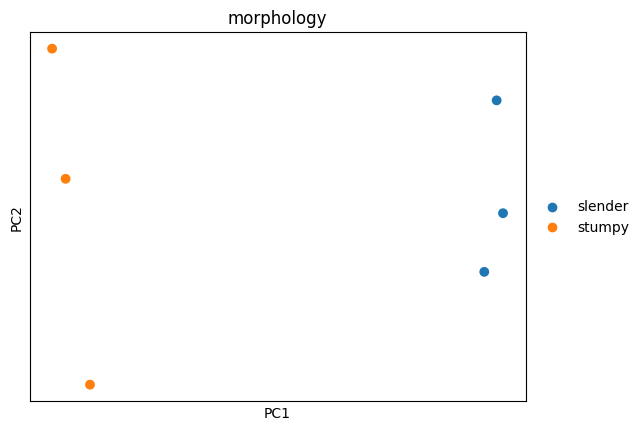

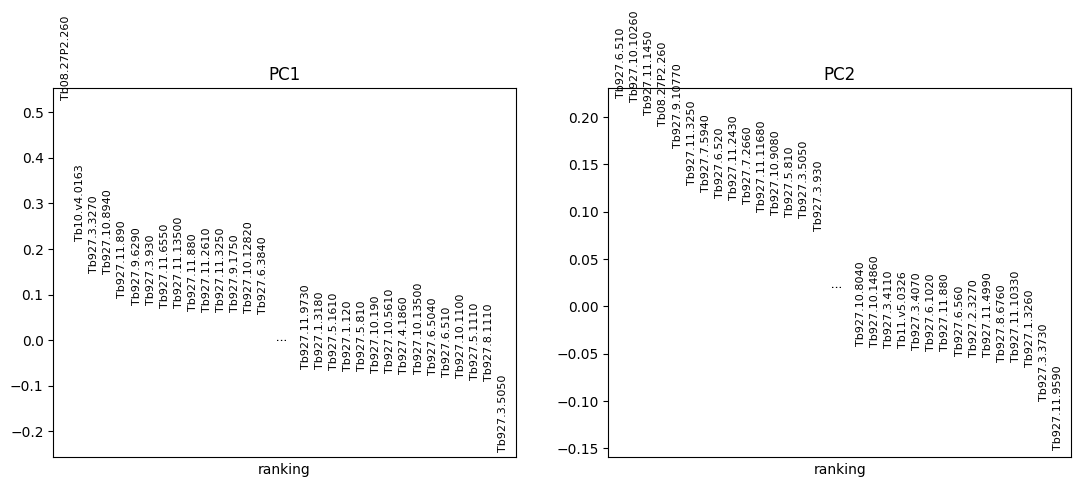

In [10]:
import scanpy as sc

sc.tl.pca(dds)
sc.pl.pca(dds, color="morphology", size=200)
sc.pl.pca_loadings(dds, components = '1,2')

<div class="alert alert-block alert-warning">

Questions:

5. Is there a separation between the groups?
6. What is PC1 separating?
7. What is PC2 separating?
8. Which 5 genes contribute most to PC1. Which 2 contribute most to PC2?

<div class="alert alert-block alert-success">
Answer:
    
5. Yes, PC1 separates slender from stumpy
6. slender from stumpy forms
7. PC2 shows a bigger spread accross stumpy than slender
8. PC1: Tb08.27P2.260, Tb10.v4.0163, Tb927.3.3270, Tb927.10.8940, Tb927.11.890
   PC2: Tb927.6.510, Tb927.10.10260
